In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('dataset.csv')



In [4]:
# Assuming the last column is the label and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)




In [11]:
df.head()

,Power,Autocorr skew,Autocorr kurt,Signal presence (any)
0,-92.570707,9.261919,120.276922,-1
1,-92.358887,10.026215,131.861518,-1
2,-92.705185,8.828406,113.268423,-1
3,-92.571809,9.355924,120.657887,-1
4,-92.462789,9.578793,124.646342,-1


In [6]:
y[y==0] = -1

In [10]:
df.describe()

,Power,Autocorr skew,Autocorr kurt,Signal presence (any)
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,-91.046735,6.646883,83.563193,-0.333333
std,3.267843,3.901838,53.225095,0.942888
min,-93.964806,-0.438609,1.460670,-1.000000
25%,-93.001991,1.619165,9.165418,-1.000000
50%,-92.686222,9.049400,115.456422,-1.000000
75%,-90.251474,9.481830,122.895801,1.000000
max,-79.491580,10.767625,144.319729,1.000000


In [12]:
np.save('X.npy', X)
np.save('y.npy', y)


In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [4]:
# Predict labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class



Accuracy: 0.9975


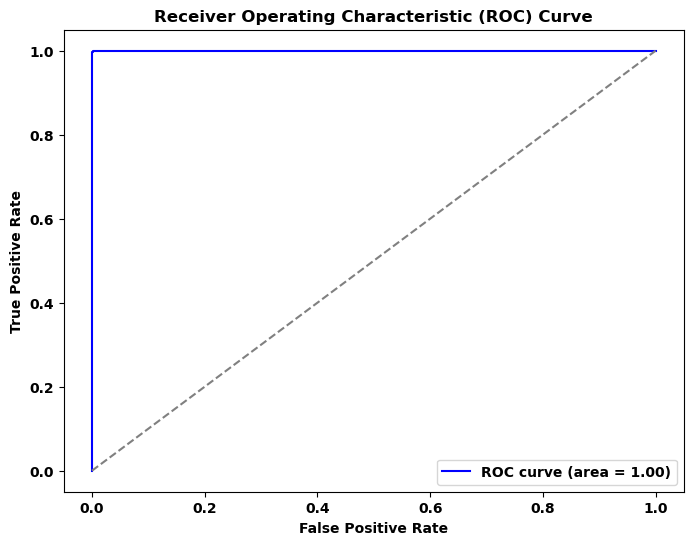

In [5]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
